(30, 512, 512)
(30, 512, 512)


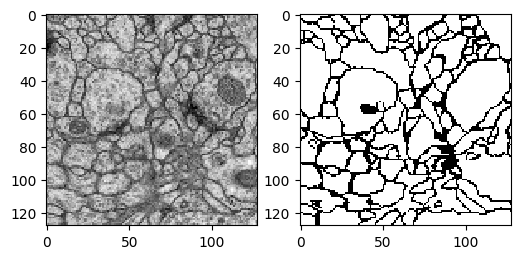

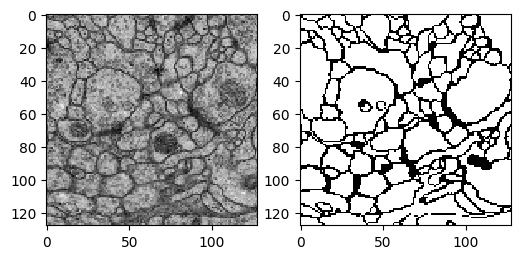

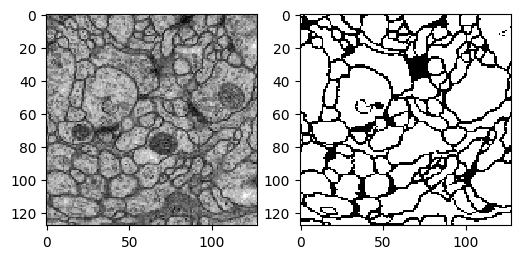

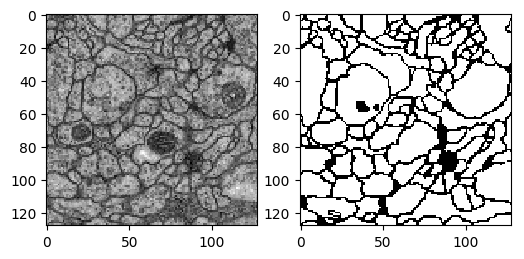

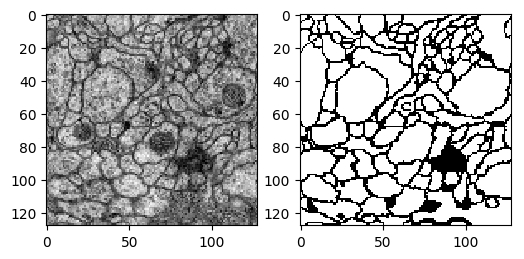

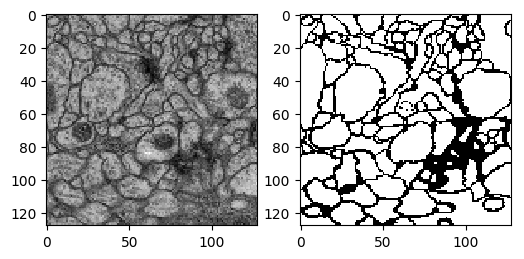

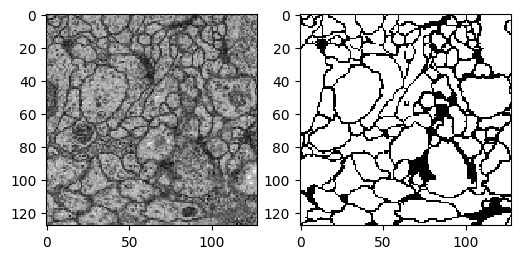

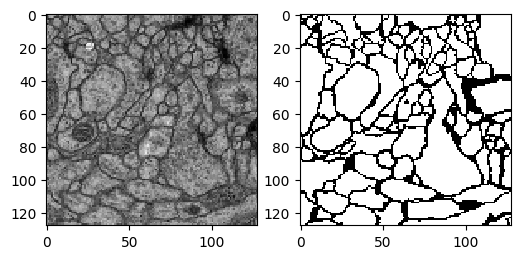

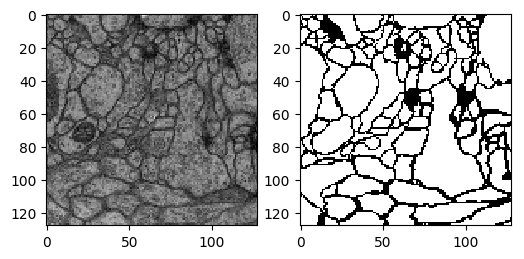

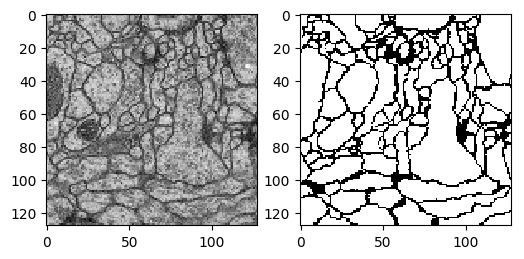

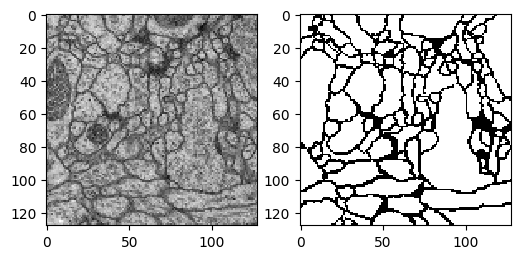

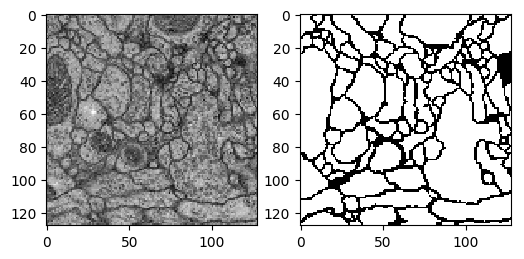

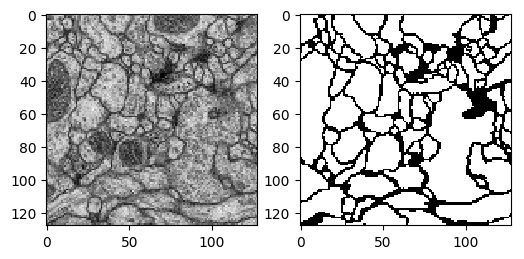

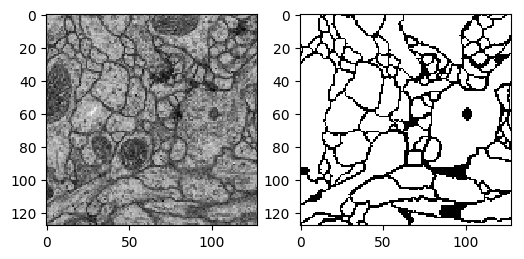

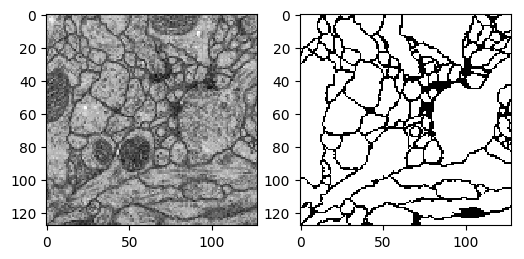

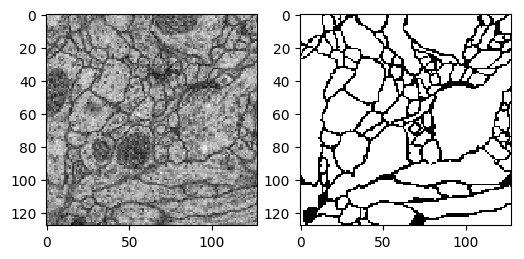

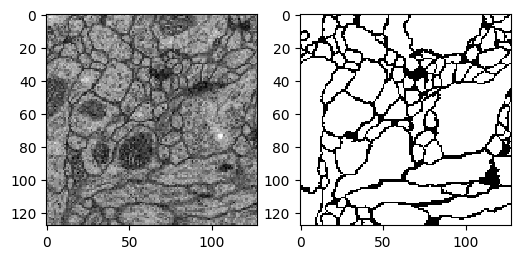

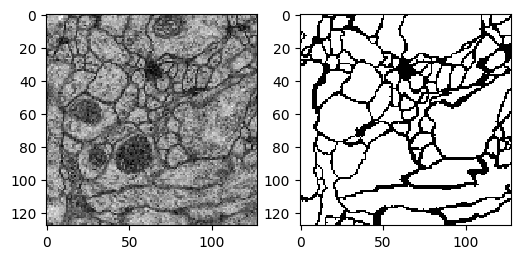

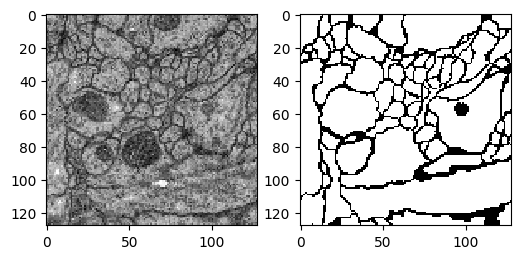

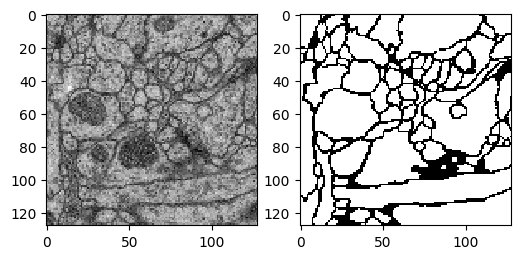

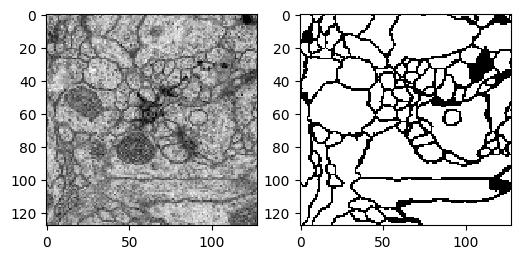

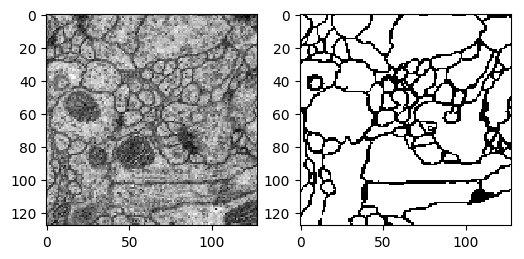

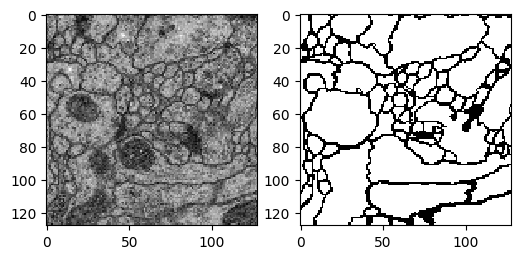

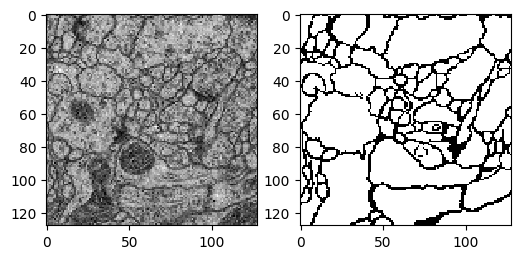

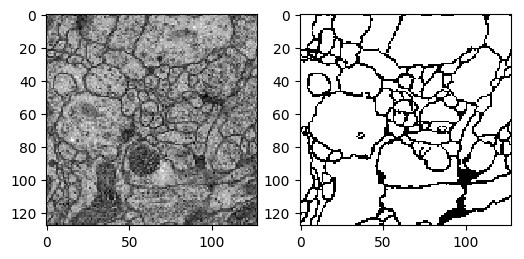

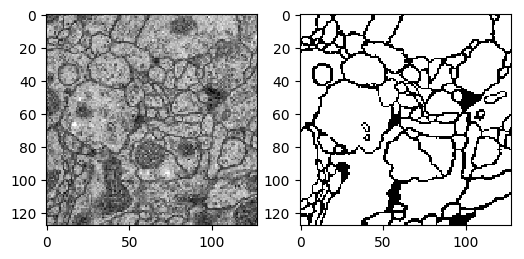

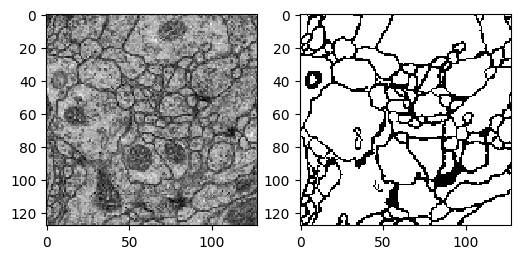

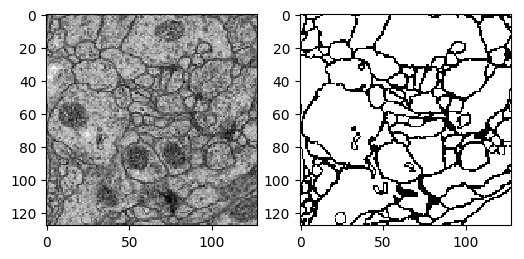

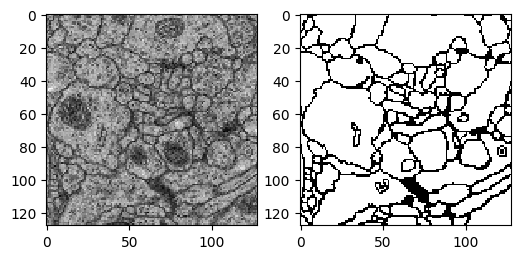

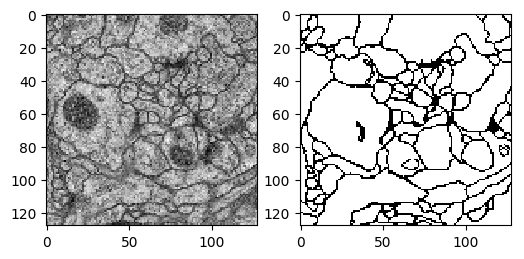

In [33]:
%matplotlib inline
from __future__ import print_function
from skimage.transform import resize
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import random
import hashlib

import sys; sys.path.append('../')
from src.utils.data import random_transforms

img_trn = tiff.imread('../data/train-volume.tif')
msk_trn = tiff.imread('../data/train-labels.tif')

print(img_trn.shape)
print(msk_trn.shape)

for img,msk in zip(img_trn, msk_trn):
    _img = resize(img, (128,128))
    _msk = resize(msk, (128,128)).round()
    fig,_ = plt.subplots(nrows=1, ncols=2)
    fig.axes[0].imshow(_img, cmap='gray')
    fig.axes[1].imshow(_msk, cmap='gray')
    plt.show()

In [43]:
img = img_trn[0]
random.seed(865)


hashes = {}
for _ in range(10000):
    img_t = random_transforms([img]).pop()
    img_t = img_t.copy(order='C')
    hsh = hashlib.sha1(img_t).digest()
    hashes[hsh] = True

print(len(hashes.keys()))

8


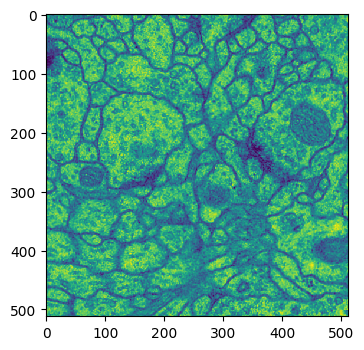

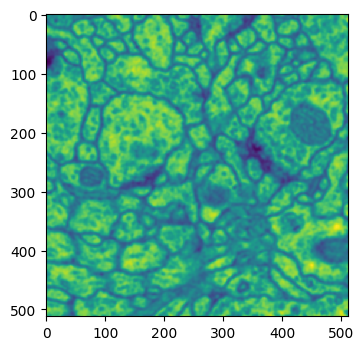

False


In [28]:
from skimage.filters import gaussian
img = img_trn[0]
img_t = gaussian(img, sigma=2)
plt.imshow(img)
plt.show()

plt.imshow(img_t)
plt.show()

print(np.all(img_t == img))